## Importing the libraries

In [1]:
# Adding comments for clarity
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
# Adding comments for clarity
data = pd.read_csv('Apple historical_data.csv')

In [3]:
# Adding comments for clarity
data

,Date,Open,High,Low,Close
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530
...,...,...,...,...,...
11089,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
11090,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
11091,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
11092,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007


In [4]:
# Adding comments for clarity
data['Date'] = pd.to_datetime(data['Date'], utc = 'True')

In [8]:
# Adding comments for clarity
data.set_index('Date', inplace=True)

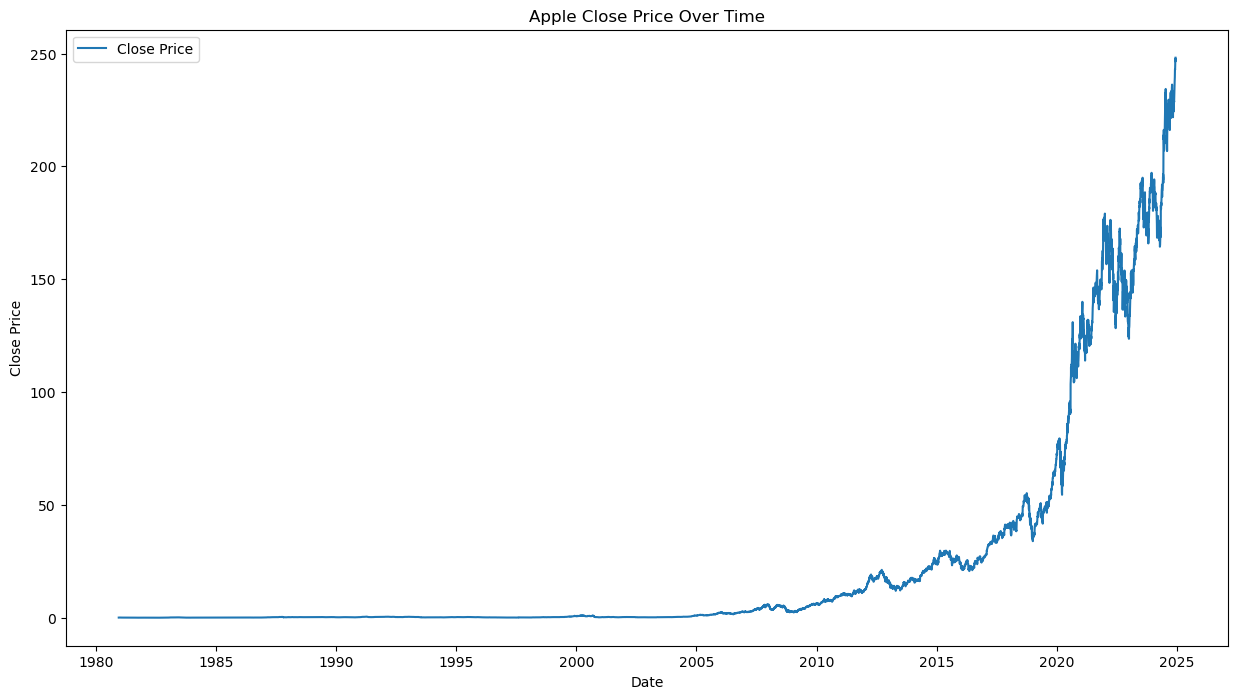

In [11]:
# Adding comments for clarity
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [15]:
# Adding comments for clarity

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

In [17]:
# Adding comments for clarity

X = data[['Year', 'Month', 'Day']]
y = data['Close']

## Splitting the dataset into the Training set and Test set

In [19]:
# Adding comments for clarity
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Multiple Linear Regression

In [20]:
# Adding comments for clarity
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [23]:
# Adding comments for clarity
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)

# Convert y_pred and y_test to NumPy arrays and reshape them
y_pred = np.array(y_pred).reshape(-1, 1)  
y_test = np.array(y_test).reshape(-1, 1)

# Print concatenated arrays
print(np.concatenate((y_pred, y_test), axis=1))

[[ 59.04  31.85]
 [-24.21   0.1 ]
 [ 32.03   1.85]
 ...
 [ 31.56   2.05]
 [ 13.55   0.35]
 [ 40.2    2.96]]


## Evaluating the Model Performance

In [25]:
# Adding comments for clarity
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.44836464675577525

## Polynomial Regression

In [28]:
# Adding comments for clarity
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [29]:
# Adding comments for clarity
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[51.25 31.85]
 [ 1.69  0.1 ]
 [-8.17  1.85]
 ...
 [-9.3   2.05]
 [-2.69  0.35]
 [-1.95  2.96]]


## Evaluating the Model Performance

In [32]:
# Adding comments for clarity
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9284799157725342

## Support Vector Regression (SVR)

In [34]:
# Adding comments for clarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR




In [36]:
# Adding comments for clarity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
# Adding comments for clarity
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
# Adding comments for clarity
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

## Predicting the Test set results

In [43]:
# Adding comments for clarity
y_pred = regressor.predict(X_test)  # Use X_test

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[32.87 31.85]
 [ 0.1   0.1 ]
 [ 1.31  1.85]
 ...
 [ 1.84  2.05]
 [-0.16  0.35]
 [ 6.04  2.96]]


## Evaluating the Model Performance

In [45]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6298573018959914

## Decision Tree Regression

In [47]:
# Adding comments for clarity
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
# Adding comments for clarity
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [51]:
# Adding comments for clarity
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

# Reshape y_test using .values
y_test = y_test.values.reshape(-1, 1)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test), 1))

[[31.84 31.85]
 [ 0.1   0.1 ]
 [ 1.96  1.85]
 ...
 [ 1.99  2.05]
 [ 0.37  0.35]
 [ 2.86  2.96]]


## Evaluating the Model Performance

In [53]:
# Adding comments for clarity
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9993865380650989

## Random Forest Regression

In [55]:
# Adding comments for clarity
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
# Adding comments for clarity
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [59]:
# Adding comments for clarity
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[31.67 31.85]
 [ 0.1   0.1 ]
 [ 1.94  1.85]
 ...
 [ 1.95  2.05]
 [ 0.36  0.35]
 [ 3.16  2.96]]


## Evaluating the Model Performance

In [61]:
# Adding comments for clarity
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9995859607985911

## Models Tested and Results:
#### Multiple Linear Regression: R² =0.448

#### Polynomial Regression: R² = 0.928

#### Support Vector Regression (SVR): R² = 0.629

#### Decision Tree Regression: R² = 0.9993

#### Random Forest Regression: R² = 0.9995



In [ ]:
# Adding comments for clarity
